# Tanaya APP


### Clone repo

In [ ]:
# Run once
!git clone https://github.com/Abdansb/tanaya-capstone.git

Cloning into 'tanaya-capstone'...
remote: Enumerating objects: 1570, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 1570 (delta 5), reused 17 (delta 3), pack-reused 1545
Receiving objects: 100% (1570/1570), 110.40 MiB | 41.32 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [1]:
import os

base_dir = 'train/'

chernozem_dir = os.path.join(base_dir, 'chernozem')
laterite_dir = os.path.join(base_dir, 'laterite')
podsolik_dir = os.path.join(base_dir, 'podsolik')

print('total training chernozem images:', len(os.listdir(chernozem_dir)))

chernozem_files = os.listdir(chernozem_dir)
print(chernozem_files[:10])

total training chernozem images: 179
['85.jpg', '101.jpg', '163.jpg', '132.jpg', '39.jpg', '179.jpg', '176.jpg', '177.jpg', '122.jpg', '153.jpg']


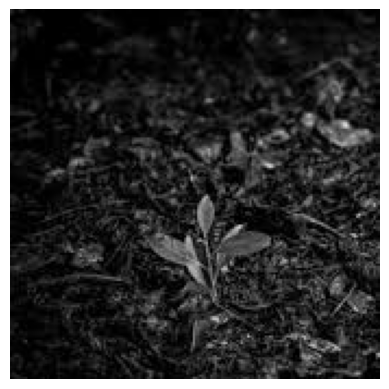

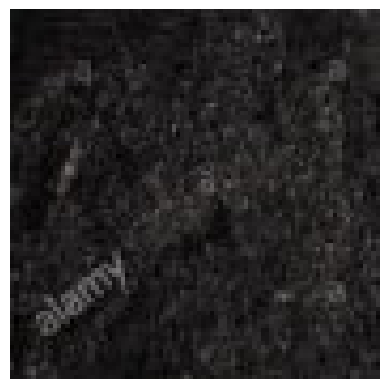

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_chernozem = [os.path.join(chernozem_dir, fname) 
                for fname in chernozem_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_chernozem):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

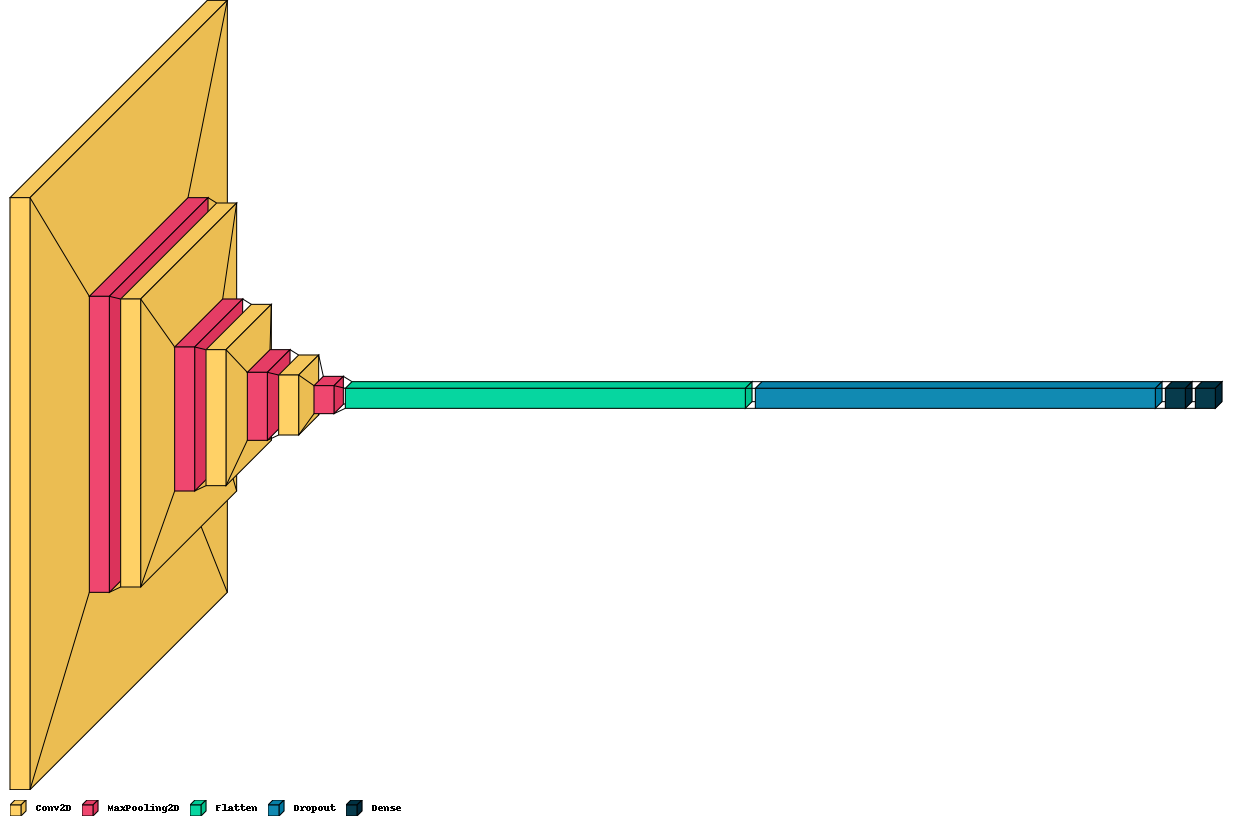

In [29]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

#! pip install visualkeras
import visualkeras
visualkeras.layered_view(model, legend=True)

In [30]:
# Set the training parameters
#model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
# Download module, Run once
!pip install Keras-Preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00


In [31]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=10
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=10
)

Found 348 images belonging to 3 classes.
Found 85 images belonging to 3 classes.


In [32]:
# Train the model
history = model.fit(train_generator, epochs=5, steps_per_epoch=5, validation_data = validation_generator, verbose = 1, validation_steps=5)

Train for 5 steps, validate for 5 steps
Epoch 1/5
5/5 [==============================] - 95s 19s/step - loss: 1.4715 - accuracy: 0.3800 - val_loss: 1.0029 - val_accuracy: 0.3200
Epoch 2/5
5/5 [==============================] - 116s 23s/step - loss: 1.0395 - accuracy: 0.5000 - val_loss: 0.7822 - val_accuracy: 0.8400
Epoch 3/5
5/5 [==============================] - 113s 23s/step - loss: 0.6249 - accuracy: 0.8000 - val_loss: 0.3280 - val_accuracy: 0.8400
Epoch 4/5
5/5 [==============================] - 112s 22s/step - loss: 0.3006 - accuracy: 0.8800 - val_loss: 0.2783 - val_accuracy: 0.8400
Epoch 5/5
5/5 [==============================] - 111s 22s/step - loss: 0.4401 - accuracy: 0.7800 - val_loss: 0.2448 - val_accuracy: 0.8400


In [1]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

NameError: name 'history' is not defined

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [28]:
import numpy as np
#from google.colab import files
from keras_preprocessing.image import load_img, img_to_array


path = "180.jpg"
img = load_img(
path,
grayscale=False,
color_mode='rgb',
target_size=(150, 150),
    #interpolation='nearest',
  #keep_aspect_ratio=True
)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
#print(fn)
print("[chernozem, laterite, podsolik]")
print(classes)

[chernozem, laterite, podsolik]
[[1. 0. 0.]]


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)